In [ ]:
import rasterio
from pyproj import Transformer
import numpy as np
import glob
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import RegularGridInterpolator

In [2]:
files = glob.glob('./NLCD_WBD18/*.tif', recursive=True)

In [4]:
da_dem = rioxarray.open_rasterio("dem_WBD18.tif").squeeze()
interp_func = RegularGridInterpolator((da_dem.y, da_dem.x), da_dem.values)

In [7]:
elevation = np.empty((15,5))
for i in range(15):
    with rasterio.open(files[i]) as src:
        # Read the shape
        height, width = src.height, src.width
        
        # Get the affine transform (maps pixel coordinates to geographic coordinates)
        transform = src.transform
        crs = src.crs

        # Generate row and column indices
        rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

        # Convert row/col indices to coordinates
        xs, ys = rasterio.transform.xy(transform, rows, cols)

        # Convert from tuple lists to numpy arrays
        xs = np.array(xs)
        ys = np.array(ys)

        # Create transformer: from raster CRS to WGS84 (lat/lon)
        transformer = Transformer.from_crs(crs, "EPSG:4326", always_xy=True)

        # Project x/y to lon/lat
        lons, lats = transformer.transform(xs, ys)
        #lons = np.reshape(lons,(height, width))
        #lats = np.reshape(lats,(height, width))
        
        nlcd = src.read(1).flatten()  # '1' means read the first band

        points = np.transpose(np.array([lats, lons]))  # (y, x) pairs

        z_interp = interp_func(points)

        print('i = ' + str(i))

        mask = ~np.isin(nlcd, [21, 22, 23, 24])
        elevation[i,0] = np.mean(z_interp[mask])
        #print('Rural mean elevation is ' + str(elevation[i,4]) )


        mask = np.isin(nlcd, [21])
        elevation[i,1]= np.mean(z_interp[mask])
        #print( 'Urban Open Space mean elevation is ' + str(elevation[i,0]) )

        mask = np.isin(nlcd, [22])
        elevation[i,2] = np.mean(z_interp[mask])
        #print('Urban Low Intensity mean elevation is ' + str(elevation[i,1]) )

        mask = np.isin(nlcd, [23])
        elevation[i,3]= np.mean(z_interp[mask])
        #print('Urban Medium Intensity mean elevation is ' + str(elevation[i,2]) )

        mask = np.isin(nlcd, [24])
        elevation[i,4] = np.mean(z_interp[mask])
        #print('Urban High Intensity mean elevation is ' + str(elevation[i,3]) )



i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14


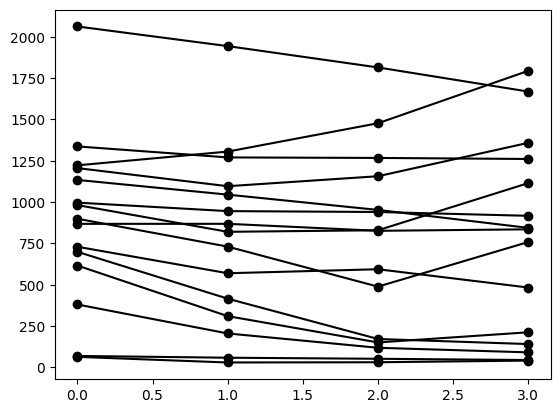

In [14]:
for i in range(15):
    plt.plot(elevation[i,1:],'ko-')
    #plt.yscale('log')